In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
import warnings
warnings.filterwarnings('ignore')

In [18]:
sal_data = {'Exp' : [2,2.2,2.8,4,7,8,11,12,21,25],
           'Salary' : [7,8,11,15,22,29,37,45.7,49,52]
           }
df = pd.DataFrame(sal_data)
df

,Exp,Salary
0,2.0,7.0
1,2.2,8.0
2,2.8,11.0
3,4.0,15.0
4,7.0,22.0
5,8.0,29.0
6,11.0,37.0
7,12.0,45.7
8,21.0,49.0
9,25.0,52.0


In [19]:
x = df[['Exp']]
y = df['Salary']

In [20]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.30,random_state = 1)

In [30]:
lr = LinearRegression()
lr.fit(xtrain,ytrain)
ypred = lr.predict(xtest)

In [31]:
r2_score(ytest,ypred)

0.7619215136651009

In [23]:
mean_absolute_error(ytest,ypred)

6.63595941321665

In [24]:
np.sqrt(mean_squared_error(ytest,ypred))

8.264506785826224

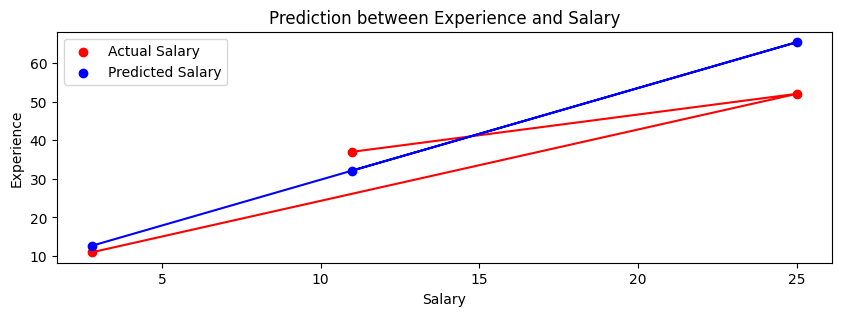

In [25]:
plt.figure(figsize = (10,3))
plt.scatter(xtest,ytest,label = "Actual Salary",color = 'red')
plt.plot(xtest,ytest,color = 'red')
plt.scatter(xtest,ypred,label = "Predicted Salary",color = 'blue')
plt.plot(xtest,ypred,color = 'blue')
plt.title("Prediction between Experience and Salary")
plt.xlabel("Salary")
plt.ylabel("Experience")
plt.legend()
plt.show()

In [38]:
pf = PolynomialFeatures(degree = 2)
poly_x = pf.fit_transform(xtrain)
lr = LinearRegression()
lr.fit(poly_x,ytrain)
yp = lr.predict(pf.fit_transform(xtest))

In [39]:
r2_score(ytest,yp)

0.9645003380149592

In [40]:
mean_absolute_error(ytest,yp)

2.690563091214704

In [41]:
np.sqrt(mean_squared_error(ytest,yp))

3.191309853777833

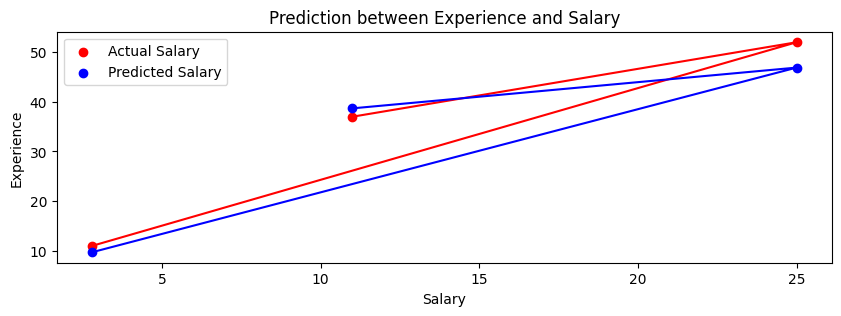

In [42]:
plt.figure(figsize = (10,3))
plt.scatter(xtest,ytest,label = "Actual Salary",color = 'red')
plt.plot(xtest,ytest,color = 'red')
plt.scatter(xtest,yp,label = "Predicted Salary",color = 'blue')
plt.plot(xtest,yp,color = 'blue')
plt.title("Prediction between Experience and Salary")
plt.xlabel("Salary")
plt.ylabel("Experience")
plt.legend()
plt.show()